# Análisis de Lesiones Cutáneas para la Detección de Melanoma
## INF395 Introducción a las Redes Neuronales and Deep Learning
- Estudiante: Alessandro Bruno Cintolesi Rodríguez
- ROL: 202173541-0

#### 0.- Setup

In [17]:
# Import torch
import torch
from torch import nn

# Setup random seed
torch.manual_seed(42)

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


#### 1.- Data preparation

In [18]:
from pathlib import Path

# Define data directory
image_path = Path("skin-lesions/")
print(f"Image path exists: {image_path.exists()}")

Image path exists: True


In [19]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [20]:
walk_through_dir(image_path)

There are 3 directories and 0 images in 'skin-lesions'.
There are 3 directories and 0 images in 'skin-lesions\test'.
There are 0 directories and 117 images in 'skin-lesions\test\melanoma'.
There are 0 directories and 393 images in 'skin-lesions\test\nevus'.
There are 0 directories and 90 images in 'skin-lesions\test\seborrheic_keratosis'.
There are 3 directories and 0 images in 'skin-lesions\train'.
There are 0 directories and 374 images in 'skin-lesions\train\melanoma'.
There are 0 directories and 1372 images in 'skin-lesions\train\nevus'.
There are 0 directories and 254 images in 'skin-lesions\train\seborrheic_keratosis'.
There are 3 directories and 0 images in 'skin-lesions\valid'.
There are 0 directories and 30 images in 'skin-lesions\valid\melanoma'.
There are 0 directories and 78 images in 'skin-lesions\valid\nevus'.
There are 0 directories and 42 images in 'skin-lesions\valid\seborrheic_keratosis'.


In [21]:
# Define train, test and validation directories
train_dir = image_path / "train"
test_dir = image_path / "test"
val_dir = image_path / "val"

train_dir, test_dir, val_dir

(WindowsPath('skin-lesions/train'),
 WindowsPath('skin-lesions/test'),
 WindowsPath('skin-lesions/val'))

#### 2.- Visualize an image

In [22]:
import random
from PIL import Image

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Select a random image path
random_image_path = random.choice(image_path_list)

# Get the class name from the image path
class_name = random_image_path.parent.name

# Open the image
img = Image.open(random_image_path)

# Print out some information about the image
print(f"Image path: {random_image_path}")
print(f"Class name: {class_name}")
print(f"Image size: {img.size}")
print(f"Image format: {img.format}")

# Show the image
img.show()

Image path: skin-lesions\train\nevus\ISIC_0012673.jpg
Class name: nevus
Image size: (3008, 2000)
Image format: JPEG


#### 3.- Transforming data

In [23]:
# Import necessary libraries for data transformation and loading
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

In [24]:
data_transform = transforms.Compose([
	transforms.Resize(size=(64, 64)),
	transforms.RandomHorizontalFlip(p=0.5),
	transforms.ToTensor(),
])

In [25]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
	"""Plots a series of random images from image_paths.

	Will open n image paths from image_paths, transform them
	with transform and plot them side by side.

	Args:
		image_paths (list): List of target image paths.
		transform (PyTorch Transforms): Transforms to apply to images.
		n (int, optional): Number of images to plot. Defaults to 3.
		seed (int, optional): Random seed for the random generator. Defaults to 42.
	"""
	random.seed(seed)
	random_image_paths = random.sample(image_paths, k=n)
	for image_path in random_image_paths:
		with Image.open(image_path) as f:
			fig, ax = plt.subplots(1, 2)
			ax[0].imshow(f)
			ax[0].set_title(f"Original \nSize: {f.size}")
			ax[0].axis("off")

			# Transform and plot image
			# Note: permute() will change shape of image to suit matplotlib
			# (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
			transformed_image = transform(f).permute(1, 2, 0)
			ax[1].imshow(transformed_image)
			ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
			ax[1].axis("off")

			fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

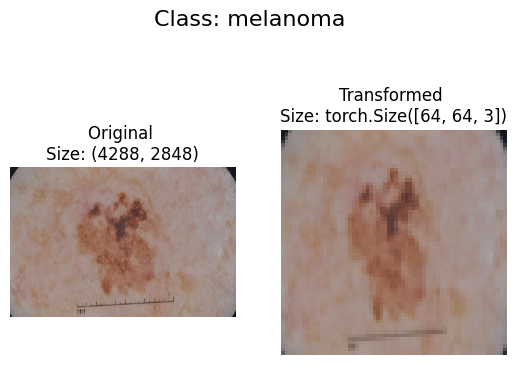

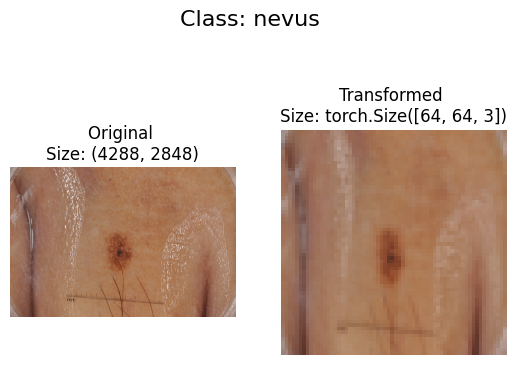

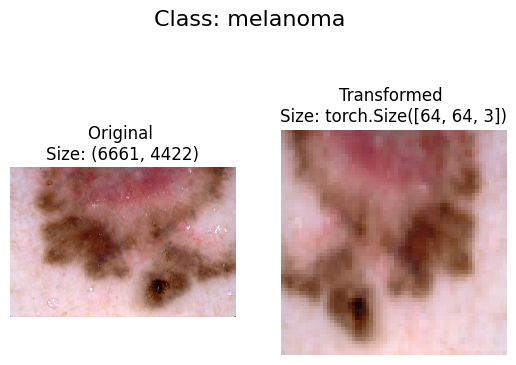

In [26]:
plot_transformed_images(image_path_list, data_transform, n=3, seed=42)